<a href="https://colab.research.google.com/github/tlyonsSETU/Maths-ODE/blob/main/Workbook%201%20-%20Numerical%20Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maths Ordinary Differential Equations - Autumn 2023


# __Numerical Methods__



* This workbook implements __Euler's method__, the __Euler-Heun method__ and Euler's method for __multi-component systems.__


* Each of these algorithms are dfeined as functions below.



# Importing libraries


* The cell below imports the __numpy__ library as __np__ (an abbreviation we choose to save typing numpy wach time).


* The following cell imports to __matplotlib__ library, which we will use to plot the solutions of ODE obtaeind using these numerical methods.


* The run a code cell (the gray cells), click on it and press __Shift__ and __Enter__ or press the play command to the left of the cell.


In [ ]:
import numpy as np
from numpy import cos, sin, exp, pi,tan, log, arctan,arccos

In [ ]:
import matplotlib.pyplot as plt

* The library in the following cell is specifically used for __Google Colab__

* It is used for downloading files, such as plots which we will create in this workbooks.

In [ ]:
from google.colab import files

# Euler's Method

* The cell below is a function to execute __Euler's Metod.__


* It requires __5 inputs:__
    1. The function __f(x,y)__ appearing in the ODE.
    2. The start point __x0__.
    3. The end point __x1__.
    4. The intial value __y0__.
    5. The number of steps __n__ to take when implementing Euler's method.

In [ ]:
def Euler(f, x0, xn, y0, n):
    x = np.linspace(x0,xn,n+1)
    h=x[1]-x[0]
    y = np.zeros(n+1)
    for i in range(n+1):
        y[0]=y0
        y[i]= y[i-1]+h * f(x[i-1], y[i-1])
        x[i]=x[i-1]+h
    return np.round(y,5)

# Example 1 - From lectures on Tuesday, 8 November 2022


* This is the example we did by hand during lectures on Tuesday, 8 November.


* This example is also in the notes on Moodel: __Lecture 9.pdf, Example 1 - p. 6__


* Given the __IVP__
$$
\frac{dy}{dx} = \frac{x^2 + y^2}{ 10 }\quad y(1.4) = 2.5,
$$
use __5 steps__ of Euler's method to evaluate $y(1.5)$.

__Solution:__

* To begin, we need to __define__ the function __f(x,y)__ using the __def()__ commanad.

* We are going to call our function __f1(x,y)__ since it is the function for __Example 1__.

* The systax used is __**__ to represent __powers__ and __/__ to represent division.

* Every __def()__ command __must__ finish with a __return__ command, which tells python what the output of the function should be.

In [ ]:
def f1(x,y):
    return (x**2 +y**2)/10

* We now set the rest of the inputs given in the problem as follows:

In [ ]:
x0=1.4
xn=1.5
y0=2.5
n=5

* Now we can run the __Euler()__ function using these inputs as follows:

In [ ]:
Euler(f1,x0,xn,y0,n)

array([2.5    , 2.51712, 2.53454, 2.55225, 2.57027, 2.5886 ])

* These are the values for __y0__, __y1__, __y2__, __y3__, __y4__ and __y5__.

* We can plot these against the x-values __x0__, __x1__, __x2__, __x3__, __x4__ and __x5__.

* To create the plot we use the matplotlib command __plt.plot()__

* Before we do that, we have to create our __x__ and __y__ values:
    * The __y__ values are just the output of the __Euler()__ function so we just say

In [ ]:
y= Euler(f1,x0,xn,y0,n)
y

array([2.5    , 2.51712, 2.53454, 2.55225, 2.57027, 2.5886 ])

* The __x__ values are created using the numpy function __np.linspace()__

In [ ]:
x=np.linspace(x0,xn,n+1)
x

array([1.4 , 1.42, 1.44, 1.46, 1.48, 1.5 ])

* Now we can create our plot:

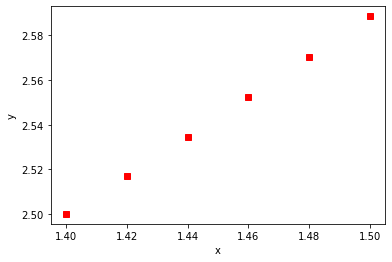

In [ ]:
plt.plot(x,y,'s',color='red') # Plot y vs x, using a 'red' square ('s') markers

plt.xlabel('x') # Label the x-axis
plt.ylabel('y') # Label the y-axis

plt.savefig('Plot_eg1.pdf') # Save the figure as a pdf called Plot_eg1

### Downloading the file

* The figure __Plot_eg1.pdf__ has been saved on the google server where this workbook is running.

* To download this file to your own computer use the command __files.download(Plot_eg1.pdf)__

* The file will save to your usual __Downloads folder__.

In [ ]:
files.download('Plot_eg1.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# __More steps__

* Now that we are using python to do our calculations, we can use a much bigger __n__ to solve our IVP numerically.

* This ``should'' make our solution more accurate (howver this is not always the case, so be careful).


* We will solve the exact same IVP as __Example 1__ but now use __n=100__ steps,

## __Exercise 1__


* Given the IVP
$$
\frac{dy}{dx} = \frac{x^2 + y^2}{10},\quad y(1.4) = 2.5
$$
follow the steps in __Example 1__ with $n=100$ steps of the Euler method to evaluate $y(1.5)$.


* Create a appropriate __x__ and __y__ lists to plot this solution using __plt.plot()__

## __Exercise 2__

* Given the IVP
$$
\frac{dy}{dx} = \sin(xy)\quad y(1)=\pi,
$$
answer the following:
1. Use __n=10__ steps of the Euler method to solve for $y(2.5)$.  _Hint_: __pi__ is used to represent $\pi$ in python

2. Use __n=1000__ steps of the Euler method to solve for $y(2.5)$

3. Plot both of these solutions using __plt.plot()__


In [ ]:
def f2(x,y):
    return np.sin(x*y) # * is used to denote multiplication in python

# The Euler-Heun Method

* The Euler-Heun method (also called Heun's method) is an imporvement on Euler's method.

* The Euler-Heun method uses the Euler method as an __intermediate step__ during each iteration of the calcluation.

* It tends to be much more accurate than Euler's method, especially when the step size __h__ is realatively big, or in other words, when __x0__ and __xn__ are far apart.


* The code for implementing this algorithm is defined in the cell below:

In [ ]:
def Heun(f, x0, xn, y0, n):
    x = np.linspace(x0,xn,n+1)
    h=x[1]-x[0]
    y = np.zeros(n+1)
    y_inter = np.zeros(n+1)
    for i in range(n+1):
        y[0]=y0
        y_inter[0]=y0
        y_inter[i]=y[i-1]+h*f(x[i-1],y[i-1])
        y[i]=y[i-1]+0.5*h*(f(x[i-1],y[i-1])+f(x[i],y_inter[i]))
    return np.round(y,5)

* As you can see, __Heun()__ requires the exact same __5 inputs__ as the __Euler()__ function.

## __Example 2: Comparing Euler() and Heun()__

* Given the IVP
$$
\frac{dy}{dx} = x-y\quad y(4) = 5.6
$$
answer the following:

1. Evaluate $y(12.5)$ using $n=250$ steps of Euler's method.

2. Evaluate $y(12.5)$ using $n=250$ steps of the Euler-Heun method

3. Plot the solutions obtained by each method.

## __Solution:__

* As always our first step is to define the function __f(x,y)__ as follows:

In [ ]:
def f3(x,y):
    return x - y

* Now we define the other paramters in the as they are given in the IVP:

In [ ]:
x0=4
xn=12.5
y0=5.6
n=250

### The __Euler()__ solution

* We will call the y-values of the __Euler()__ solution __ye__ (for y-euler)

In [ ]:
ye = Euler(f3,x0,xn,y0,n)
ye

array([ 5.6    ,  5.83576,  6.06465,  6.28692,  6.50279,  6.71248,
        6.91619,  7.11413,  7.3065 ,  7.49348,  7.67526,  7.85202,
        8.02392,  8.19114,  8.35382,  8.51213,  8.66622,  8.81622,
        8.96227,  9.10452,  9.24309,  9.3781 ,  9.50967,  9.63793,
        9.76299,  9.88495, 10.00391, 10.11999, 10.23328, 10.34387,
       10.45186, 10.55733, 10.66038, 10.76107, 10.8595 , 10.95574,
       11.04986, 11.14193, 11.23204, 11.32023, 11.40658, 11.49116,
       11.57401, 11.6552 , 11.73479, 11.81282, 11.88936, 11.96446,
       12.03815, 12.1105 , 12.18154, 12.25133, 12.31989, 12.38729,
       12.45354, 12.5187 , 12.5828 , 12.64588, 12.70797, 12.7691 ,
       12.82931, 12.88863, 12.94709, 13.00472, 13.06154, 13.11759,
       13.17289, 13.22746, 13.28133, 13.33453, 13.38708, 13.43899,
       13.4903 , 13.54102, 13.59117, 13.64077, 13.68984, 13.73839,
       13.78646, 13.83404, 13.88116, 13.92784, 13.97409, 14.01992,
       14.06534, 14.11038, 14.15504, 14.19934, 14.24329, 14.28

### The __Heun()__ solution

* We will call the y-values of the __Heun()__ solution __yh__ (for y-heun)

In [ ]:
yh = Heun(f3,x0,xn,y0,n)
yh

array([ 5.6    ,  5.5471 ,  5.49711,  5.44992,  5.40545,  5.3636 ,
        5.32429,  5.28742,  5.25293,  5.22072,  5.19073,  5.16287,
        5.13708,  5.1133 ,  5.09144,  5.07145,  5.05326,  5.03682,
        5.02206,  5.00893,  4.99738,  4.98735,  4.97879,  4.97166,
        4.9659 ,  4.96147,  4.95832,  4.95641,  4.95571,  4.95616,
        4.95774,  4.96039,  4.9641 ,  4.96882,  4.97452,  4.98116,
        4.98872,  4.99716,  5.00646,  5.01658,  5.0275 ,  5.03919,
        5.05162,  5.06478,  5.07864,  5.09316,  5.10834,  5.12415,
        5.14056,  5.15757,  5.17514,  5.19326,  5.21191,  5.23107,
        5.25073,  5.27087,  5.29147,  5.31252,  5.334  ,  5.35591,
        5.37821,  5.40091,  5.42398,  5.44742,  5.47121,  5.49535,
        5.51981,  5.54459,  5.56968,  5.59507,  5.62074,  5.6467 ,
        5.67292,  5.6994 ,  5.72614,  5.75311,  5.78033,  5.80776,
        5.83542,  5.86329,  5.89137,  5.91964,  5.9481 ,  5.97675,
        6.00558,  6.03458,  6.06375,  6.09308,  6.12256,  6.15

## __Plotting__ the solutions

* To plot the solutions we have to create a list of x-values with the __np.linspace()__ function:

In [ ]:
x=np.linspace(x0,xn,n+1)
x

array([ 4.   ,  4.034,  4.068,  4.102,  4.136,  4.17 ,  4.204,  4.238,
        4.272,  4.306,  4.34 ,  4.374,  4.408,  4.442,  4.476,  4.51 ,
        4.544,  4.578,  4.612,  4.646,  4.68 ,  4.714,  4.748,  4.782,
        4.816,  4.85 ,  4.884,  4.918,  4.952,  4.986,  5.02 ,  5.054,
        5.088,  5.122,  5.156,  5.19 ,  5.224,  5.258,  5.292,  5.326,
        5.36 ,  5.394,  5.428,  5.462,  5.496,  5.53 ,  5.564,  5.598,
        5.632,  5.666,  5.7  ,  5.734,  5.768,  5.802,  5.836,  5.87 ,
        5.904,  5.938,  5.972,  6.006,  6.04 ,  6.074,  6.108,  6.142,
        6.176,  6.21 ,  6.244,  6.278,  6.312,  6.346,  6.38 ,  6.414,
        6.448,  6.482,  6.516,  6.55 ,  6.584,  6.618,  6.652,  6.686,
        6.72 ,  6.754,  6.788,  6.822,  6.856,  6.89 ,  6.924,  6.958,
        6.992,  7.026,  7.06 ,  7.094,  7.128,  7.162,  7.196,  7.23 ,
        7.264,  7.298,  7.332,  7.366,  7.4  ,  7.434,  7.468,  7.502,
        7.536,  7.57 ,  7.604,  7.638,  7.672,  7.706,  7.74 ,  7.774,
      

* Now we can plot both solutions:
    * We will plot each soltuion as a line graph (not markers).
    * We will colour the __ye__ solution red abd the __yh__ solution blue.

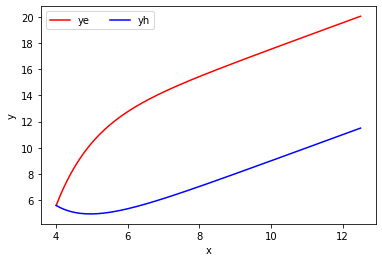

In [ ]:
plt.plot(x,ye,color='red', label='ye')
plt.plot(x,yh,color='blue', label='yh')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left', ncol=2) # The plots a legend telling us what each curve represents. The labels are defined inside each plot


## The __Exact__ solution

* The IVP in this example can actually be solved by hand, and has a solution given by
$$
y = x-1 +141.95519e^{-x}
$$

* We will define a function called __yex()__ (for y-exact) to refresent this solution:

In [ ]:
def yex(x):
    return x-1+141.95519*np.exp(-x)

* We will now add this to our previous plot and colour it green, to compare all three solutions:

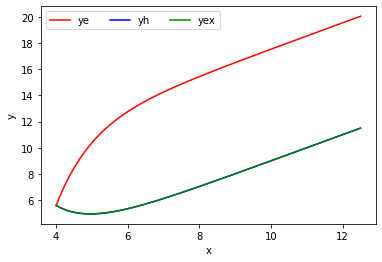

In [ ]:
plt.plot(x,ye,color='red', label='ye')
plt.plot(x,yh,color='blue', label='yh')
plt.plot(x,yex(x),color='green',label='yex')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left', ncol=3)

## The best solution

* It is clear from the plot the __yex__ and __yh__ are almost the exact same curve, so it is clear __Heun()__ is much more accurate the __Euler()__

## __Exercise 2__

The IVP
$$
\frac{dy}{dx} = x^2-y\quad y(2)=3.5
$$
has and __exact__ solution given by
$$
y(x) = x^2 -2(x-1) +11.08358e^{-x}.
$$
Given this iformation, follow the steps of __Example 2__ to answer the following:

1. Use __n=250__ steps of Euler's method to solve for $y(10)$.

2. Use __n=250__ steps of Heun's method to solve for $y(10)$.

3. Create a function to represent the exact solution given above.

4. Plot all three solutions on the same graph.

5. Which is the most accurate solution, the __Euler()__ or the __Heun()__?